# Computer Vison: Line Extraction

There exists a lot of methods allowing to detect the edges of an image. In this work, we describe several of these methods. We explain how their works and show the influence of their hyperparameters. We show that well-chosen parameters allow to extract edges on images sharing the same properties. After some processing, we thus generate black-and-white images where the wite pixels represents edges.

From these new images, we finally aim at finding the edges being on straight lines. We have explored the Hough methods and its deterministic declination. We show that, once again, using the good hyperparameters for the methods, it is possible to extract the equations of the edges being straight lines.

Finally, using a pixel-classifier, we remove from the original image the edges being lines.


In [1]:
import cv2
import numpy as np
import tools
import matplotlib.cm as cm   
from ipywidgets import interact, fixed

from image import *
from edge import *
from line import *

from notebook_utils import *

## Edges Detection

As explained earlier, we applied different methods allowing to extract the pixels located on an edge. Simply using these methods does not show good performances. Image pre and post-precessing is needed. 

Let's first describe the working of the different methods we used:
* **Naive Gradient**
    This method consists in applying a liner filter computing the partial derivate of the image in each pixel according to the a center finite difference. It basically consists in computing the difference of the two neighbouring pixels for both directions. The gradient is then computed as the average of the absolute value of the gradients in the two directions.

* **Soble Gradient** 

* **Scharr Gradient**

* **Beucher** 

* **Canny**

* **Stacking** 

We will now describe the influence of the hyperparameters of the methods on he performances. The description is done for images of two different classes. The following tool allows to visualize the impact of the variations of parameters.

In [2]:
ui, out = build_ui_edges()
display(ui, out)

Output()

### Building edges

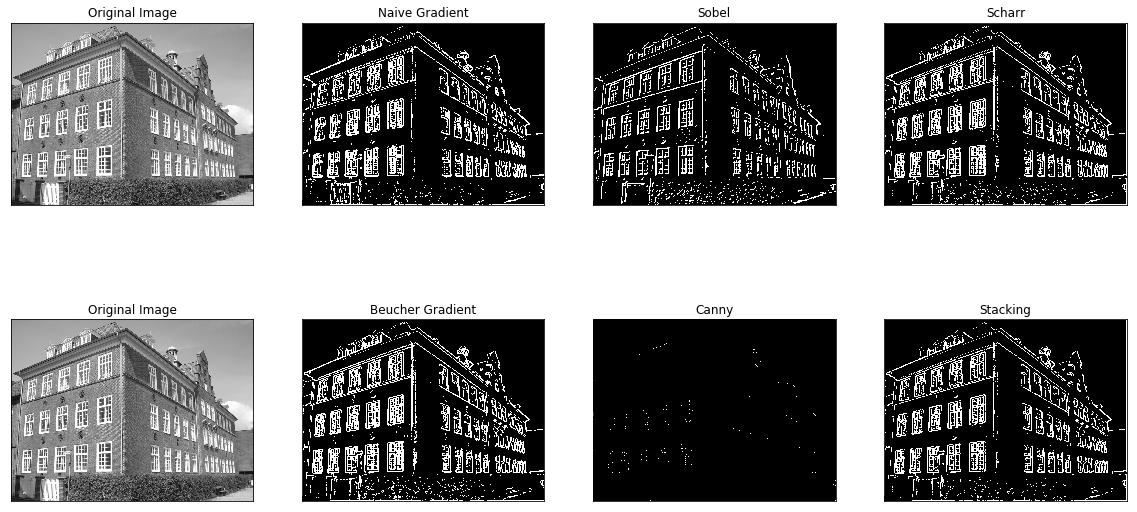

In [3]:
img = load_gray_img("img/building.png")

naive_grad = get_optimal_grads("building", "Naive Gradient")
sobel_grad = get_optimal_grads("building", "Sobel")
scharr_grad = get_optimal_grads("building", "Scharr")
canny_grad = get_optimal_grads("building", "Canny")
beucher_grad = get_optimal_grads("building", "Beucher")
stacking_grad = get_optimal_grads("building", "Stacking")

tools.multiPlot(2, 4, 
        (img, naive_grad, sobel_grad, scharr_grad, img, beucher_grad, canny_grad, stacking_grad),
        ('Original Image', 'Naive Gradient', 'Sobel', 'Scharr', 'Original Image', 'Beucher Gradient', 'Canny', 'Stacking'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))

### Sudoku edges

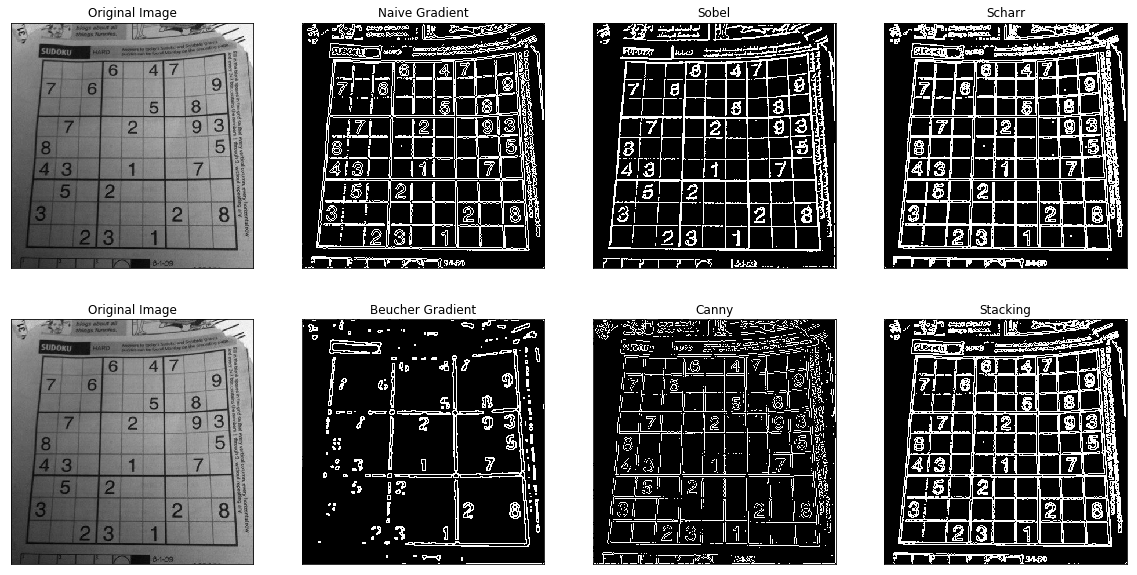

In [4]:
img = load_gray_img("img/sudoku.png")

naive_grad = get_optimal_grads("sudoku", "Naive Gradient")
sobel_grad = get_optimal_grads("sudoku", "Sobel")
scharr_grad = get_optimal_grads("sudoku", "Scharr")
canny_grad = get_optimal_grads("sudoku", "Canny")
beucher_grad = get_optimal_grads("sudoku", "Beucher")
stacking_grad = get_optimal_grads("sudoku", "Stacking")

tools.multiPlot(2, 4, 
        (img, naive_grad, sobel_grad, scharr_grad, img, beucher_grad, canny_grad, stacking_grad),
        ('Original Image', 'Naive Gradient', 'Sobel', 'Scharr', 'Original Image', 'Beucher Gradient', 'Canny', 'Stacking'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))

### Other classes of images

## Edges Detection Using Contour Detection

Contour following algorithms are a class of method allowing to extract the contour of the different objects in an image. In opposition with edge detection, it uses the topology of the image and the objects to build the frontier between the object and the backward scene. The algorithm used in the following builds the frontier dynamically by following the pixels considered as part of the frontier.

This method is thus an alternative way of extracting the edges of an image. 

In [5]:
ui, out = build_ui_edges("Following")
display(ui, out)

Output()

The method is based on two parameters. A lower and an upper threshold. The lower threshold defines a minimal intensity to apply the contour following algorithm. For a low threshold, lots of contours are detected. Most of them being irrelevant. The high threshold is the maximal intensity and shall be set to 255. 

Applying an addition Thresholding doesn't allow to increase much the performance. Neither does a preprocessing with high pass or low pass filtering. 

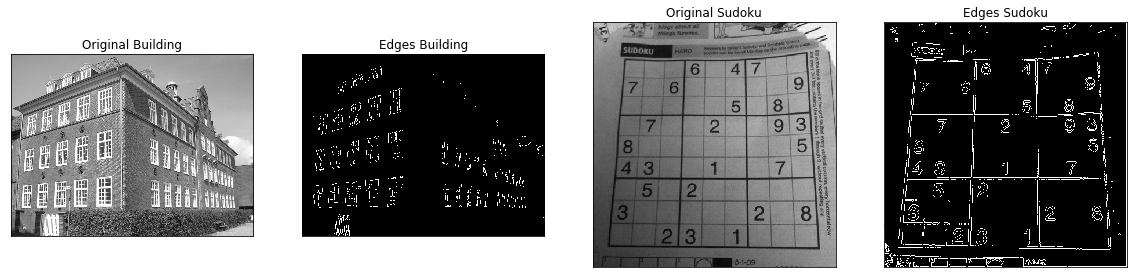

In [6]:
img_0 = load_gray_img("img/building.png")
img_1 = load_gray_img("img/sudoku.png")

edge_img_0 = get_optimal_grads("building", "Following")
edge_img_1 = get_optimal_grads("sudoku", "Following")

tools.multiPlot(1, 4, 
        (img_0, edge_img_0, img_1, edge_img_1),
        ('Original Building', 'Edges Building', 'Original Sudoku', 'Edges Sudoku'),
        cmap_tuple=(cm.gray, cm.gray, cm.gray, cm.gray))

On the building, having a high lower threshold of 240 results in the best performances. For the sudoku, the threshold of 45 yields the best contours. Let's nevertheless remark that none reaches good performances that could be compared with the previous method. Also, the parameters are completely different for the two different images.

This method's first use is not te extract edges but more to detect the contour of objects in a scene. Even though these two tasks are very similar, they are not achieved using the same methods.


## Line Extraction

## Line classification